In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, jarque_bera
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from scipy.stats import f
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
housing = fetch_california_housing()
X, y = housing.data, housing.target
feature_names = housing.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

x_train_const = sm.add_constant(X_train)
x_test_const = sm.add_constant(X_test)

model = sm.OLS(y_train, x_train_const).fit()
y_pred = model.predict(x_test_const)

In [3]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:27:21   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0

**Total Sum of Squares (TSS)**

In [4]:
# TSS = Σ(y - ȳ)²
y_mean = np.mean(y_train)
tss = np.sum((y_train - y_mean)**2)
print(f"Total Sum of Squares (TSS): {tss:.2f}")

Total Sum of Squares (TSS): 22072.88


**Residual Sum of Squares (RSS)**

In [5]:
# RSS = Σ(y - ŷ)²
y_pred = model.predict(x_train_const)
rss = np.sum((y_train - y_pred) ** 2)
print(f"Residual Sum of Squares (RSS): {rss:.2f}")

Residual Sum of Squares (RSS): 8552.11


**Explained Sum of Squares (ESS)**

In [6]:
# ESS = Σ(ŷ - ȳ)²
ess = np.sum((y_pred - y_mean)**2)
print(f"Explained Sum of Squares (ESS): {ess:.2f}")

# Relationship: TSS = ESS + RSS
print(f"TSS = ESS + RSS: {tss:.2f} = {ess:.2f} + {rss:.2f}")

Explained Sum of Squares (ESS): 13520.77
TSS = ESS + RSS: 22072.88 = 13520.77 + 8552.11


**R-squared**

In [7]:
# R² = ESS / TSS = 1 - (RSS / TSS)
r_squared = ess / tss
print(f"R-squared: {r_squared:.4f}")
print(f"Model R-squared: {model.rsquared:.4f}")

R-squared: 0.6126
Model R-squared: 0.6126


**Adjusted R-squared**

In [8]:
n = len(y_train)
p = X_train.shape[1]

adj_r_squard = 1 - (1- r_squared) * (n - 1) / (n - p - 1)
print(f"Adjusted R-squared: {adj_r_squard:.4f}")
print(f"Model Adj. R-squared: {model.rsquared_adj:.4f}")

Adjusted R-squared: 0.6124
Model Adj. R-squared: 0.6124


#### Hypothesis Testing
**F-Test for Overall Model Significance**

In [9]:
# F-statistic = (ESS / p) / (RSS / (n - p - 1))
f_statistic = (ess / p) / (rss / (n - p - 1))
print(f"F-statistic: {f_statistic:.4f}")
print(f"Model F-statistic: {model.fvalue:.4f}")

# P-value for F-test
f_pvalue = 1 - f.cdf(f_statistic, p, n - p - 1)
print(f"F-test p-value: {f_pvalue:.6f}")
print(f"Model F-test p-value: {model.f_pvalue:.6f}")

if model.f_pvalue < 0.05:
    print("Model is statistically significant (p < 0.05)")
else:
    print("Model is not statistically significant")

F-statistic: 3261.3768
Model F-statistic: 3261.3768
F-test p-value: 0.000000
Model F-test p-value: 0.000000
Model is statistically significant (p < 0.05)


**t-Test for Individual Coefficients**

In [10]:
# Get coefficient statistics
print("\nCoefficient Statistics:")
print(model.params)
print(model.pvalues)
print(model.tvalues)
print(model.conf_int())

# Check significance of each coefficient
significant_coefs = model.pvalues[model.pvalues < 0.05]
print(f"\nSignificant coefficients (p < 0.05): {len(significant_coefs)}")
print(significant_coefs)


Coefficient Statistics:
[-3.70232777e+01  4.48674910e-01  9.72425752e-03 -1.23323343e-01
  7.83144907e-01 -2.02962058e-06 -3.52631849e-03 -4.19792487e-01
 -4.33708065e-01]
[0.00000000e+000 0.00000000e+000 4.02654974e-085 4.72814374e-077
 1.06045149e-120 6.98989954e-001 4.26063487e-013 0.00000000e+000
 0.00000000e+000]
[-50.83501412  95.69652828  19.66529784 -18.67714382  23.55603434
  -0.38669102  -7.25289244 -52.76719057 -52.11666347]
[[-3.84508295e+01 -3.55957260e+01]
 [ 4.39484909e-01  4.57864910e-01]
 [ 8.75500739e-03  1.06935076e-02]
 [-1.36265741e-01 -1.10380944e-01]
 [ 7.17979082e-01  8.48310731e-01]
 [-1.23176150e-05  8.25837385e-06]
 [-4.47931265e-03 -2.57332432e-03]
 [-4.35386239e-01 -4.04198734e-01]
 [-4.50019826e-01 -4.17396304e-01]]

Significant coefficients (p < 0.05): 8
[0.00000000e+000 0.00000000e+000 4.02654974e-085 4.72814374e-077
 1.06045149e-120 4.26063487e-013 0.00000000e+000 0.00000000e+000]


**Confidence Intervals**

In [11]:
conf_int = model.conf_int(alpha=0.05)
conf_int = pd.DataFrame(
    conf_int,
    columns=["Lower CI", "Upper CI"],
    index=model.model.exog_names
)

conf_int["Coefficient"] = model.params
conf_int = conf_int[["Coefficient", "Lower CI", "Upper CI"]]
print(conf_int)

       Coefficient   Lower CI   Upper CI
const   -37.023278 -38.450829 -35.595726
x1        0.448675   0.439485   0.457865
x2        0.009724   0.008755   0.010694
x3       -0.123323  -0.136266  -0.110381
x4        0.783145   0.717979   0.848311
x5       -0.000002  -0.000012   0.000008
x6       -0.003526  -0.004479  -0.002573
x7       -0.419792  -0.435386  -0.404199
x8       -0.433708  -0.450020  -0.417396


#### Model Diagnostics

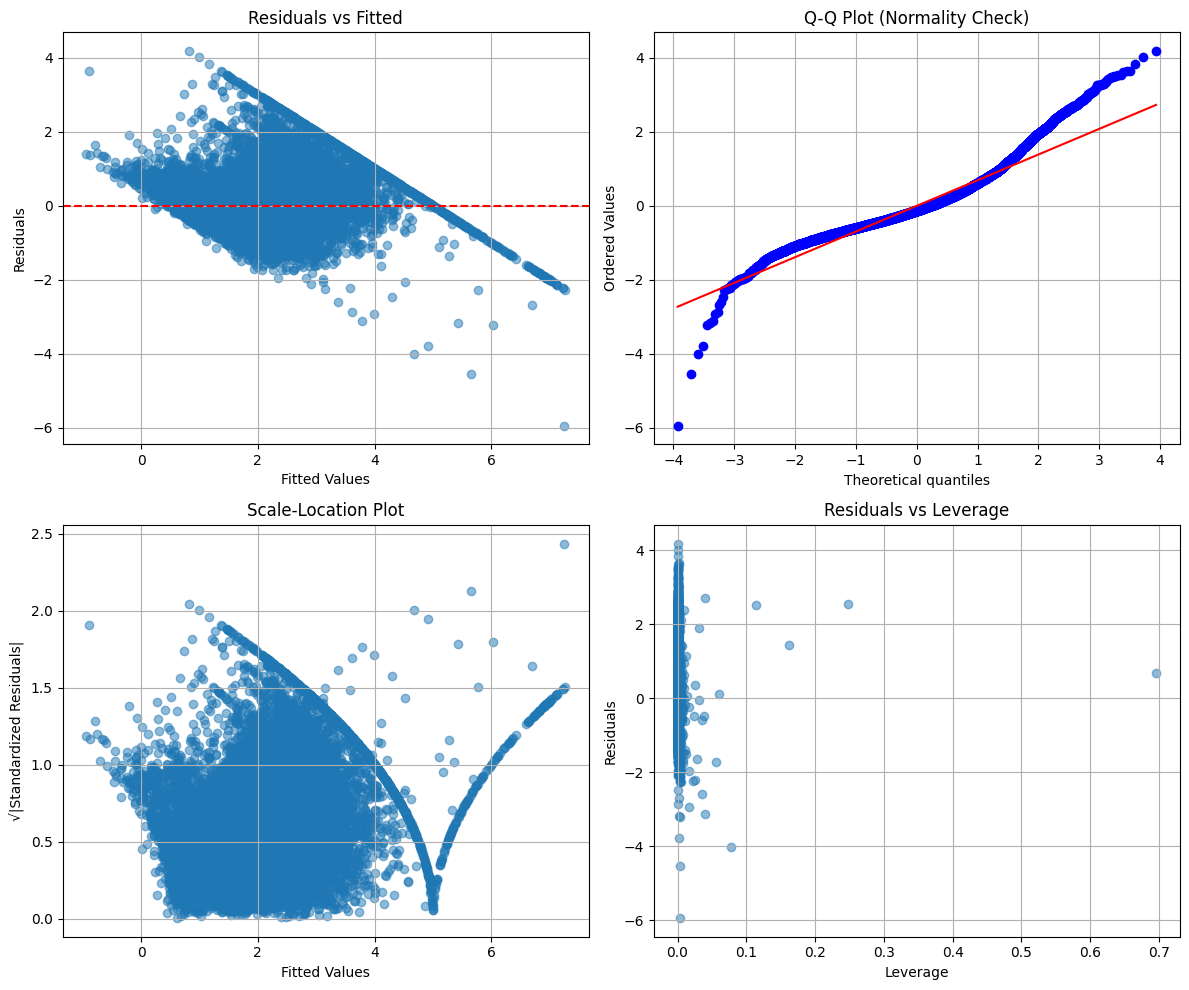

In [12]:
residuals = model.resid
fitted_values = model.fittedvalues

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Residuals vs Fitted
axes[0, 0].scatter(fitted_values, residuals, alpha=0.5)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_xlabel('Fitted Values')
axes[0, 0].set_ylabel('Residuals')
axes[0, 0].set_title('Residuals vs Fitted')
axes[0, 0].grid(True)

# Q-Q Plot (check normality)
stats.probplot(residuals, dist="norm", plot=axes[0, 1])
axes[0, 1].set_title('Q-Q Plot (Normality Check)')
axes[0, 1].grid(True)

# Scale-Location Plot
standardized_residuals = np.sqrt(np.abs(residuals))
axes[1, 0].scatter(fitted_values, standardized_residuals, alpha=0.5)
axes[1, 0].set_xlabel('Fitted Values')
axes[1, 0].set_ylabel('√|Standardized Residuals|')
axes[1, 0].set_title('Scale-Location Plot')
axes[1, 0].grid(True)

# Residuals vs Leverage
axes[1, 1].scatter(model.get_influence().hat_matrix_diag, residuals, alpha=0.5)
axes[1, 1].set_xlabel('Leverage')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title('Residuals vs Leverage')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

**Normality Test**

In [13]:
jb_stat, jb_pvalue = jarque_bera(residuals)
print(f"Jarque-Bera test: statistic={jb_stat:.4f}, p-value={jb_pvalue:.6f}")

if jb_pvalue < 0.05:
    print("Residuals are NOT normally distributed (p < 0.05)")
else:
    print("Residuals appear normally distributed")
    

if len(residuals) < 5000:
    shapiro_stat, shapiro_pvalue = shapiro(residuals)
    print(f"Shapiro-Wilk test: statistic={shapiro_stat:.4f}, p-value={shapiro_pvalue:.6f}")

Jarque-Bera test: statistic=9371.4658, p-value=0.000000
Residuals are NOT normally distributed (p < 0.05)


**Homoscedasticity Test**

In [14]:
bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuals, x_train_const)
print(f"Breusch-Pagan test: statistic={bp_stat:.4f}, p-value={bp_pvalue:.6f}")

if bp_pvalue < 0.05:
    print("Heteroscedasticity detected (p < 0.05)")
else:
    print("Homoscedasticity assumption satisfied")

Breusch-Pagan test: statistic=1170.5134, p-value=0.000000
Heteroscedasticity detected (p < 0.05)


**Comparing Models**

In [15]:
model1 = sm.OLS(y_train, sm.add_constant(X_train[:, :5])).fit()
model2 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

# AIC (Akaike Information Criterion) - lower is better
print(f"Model 1 AIC: {model1.aic:.2f}")
print(f"Model 2 AIC: {model2.aic:.2f}")

# BIC (Bayesian Information Criterion) - lower is better
print(f"Model 1 BIC: {model1.bic:.2f}")
print(f"Model 2 BIC: {model2.bic:.2f}")

lr_stat, lr_pvalue, df_diff = model2.compare_lr_test(model)
print(f"Likelihood Ratio Test: statistic={lr_stat:.4f}, p-value={lr_pvalue:.6f}")

Model 1 AIC: 38705.05
Model 2 AIC: 36013.63
Model 1 BIC: 38751.32
Model 2 BIC: 36083.04
Likelihood Ratio Test: statistic=-0.0000, p-value=nan


In [16]:
def complete_regression_analysis(X, y, feature_names):
    X_df = pd.DataFrame(X, columns=feature_names)
    X_const = sm.add_constant(X_df)

    model = sm.OLS(y, X_const).fit()
    print(model.summary())

    # Key statistics
    print("\n=== Key Statistics ===")
    print(f"R-squared: {model.rsquared:.4f}")
    print(f"Adjusted R-squared: {model.rsquared_adj:.4f}")
    print(f"F-statistic: {model.fvalue:.4f}")
    print(f"F-test p-value: {model.f_pvalue:.6f}")
    print(f"AIC: {model.aic:.2f}")
    print(f"BIC: {model.bic:.2f}")

    # Significant coefficients
    print("\n=== Significant Coefficients (p < 0.05) ===")
    significant = model.pvalues[model.pvalues < 0.05]
    for feature, pvalue in significant.items():
        coef = model.params[feature]
        print(f"{feature}: {coef:.4f} (p={pvalue:.6f})")

    # Confidence intervals
    print("\n=== 95% Confidence Intervals ===")
    conf_int = model.conf_int()
    conf_int.columns = ["Lower CI", "Upper CI"]
    for feature in conf_int.index:
        lower = conf_int.loc[feature, "Lower CI"]
        upper = conf_int.loc[feature, "Upper CI"]
        coef = model.params[feature]
        print(f"{feature}: coef={coef:.4f}, 95% CI=[{lower:.4f}, {upper:.4f}]")

    return model

model = complete_regression_analysis(X_train, y_train, feature_names)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Mon, 19 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:27:22   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.0233      0.728    -50.835      0.0